In [1]:
# 1. Import required libraries
# 2. Read the csv
# 3. Show the first record from the csv
# 4. Show the number of rows and columns
# 5. Find the amount of characters who fall under each alignment, you can use value_counts()
# 6. Find only the good alignment characters
# 7. Show only the first five records from the previous bullet point
# 8. Select the top five heroes with the highest speed who have a good alignment
# 9. Select five heroes with maximum power who have a good alignment
# 10. Find out how many superheroes there are with power of 100 with good alignment
# 11. Shape them what you got in point 10
# 12. Show all records from point 10
# 13. Retrieve the first five records with max power and has good alignment
# 14. Draw a bar plot of all superheroes who are having good alignment and a max power of the top five heroes only , take the same object of point 13, show name and total in plot with green bars
# 15. Extract villains who having a bad alignment
# 16. Show first five records of point 15
# 17. Show top five fastest super villains in terms of super speed
# 18. Top five super villains in terms of intelligence
# 19. Show who is most dangerous super villain after calculating their total (top 5 only)
# 20. Draw a histogram for speed of super heroes having fig size 10.5, provide speed in histogram for only good alignment superheroes, title should be "distribution of speed", xlabel should be "speed"
# 21. Draw a histogram for combat of super villains having fig size 10.5, provide combat in histogram for only bad alignment superheroes, title should be "distribution of combat", xlabel should be "combat"


*Things noted from reading the dataset*

In [2]:
#alot of the data is not marvel characters.
#Some alighments have nans
#at least 200 rows have only 1 stats across the board
#some of the stats go over 100
#do a join for only marvel characters
#there are some duplicates (reserach them)

1. Import Required Libraries

In [3]:
#same libraries used for this demonstration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from ETL import dataClean

2. Read the csv

In [4]:
#marvel_characters_info contains the Publishers Column to help distinguish each comic book hero
df1 = pd.read_csv('charcters_stats.csv')
df2 = pd.read_csv('marvel_characters_info.csv')

cleaning the data

In [5]:
#to ETL.py
df = dataClean(df1, df2)

just marvel heroes

In [6]:
#chooses only data from Marvel Comics
df_marvel = df[df['Publisher'] == 'Marvel Comics']

3. Show the first record from the csv

In [7]:
df_marvel.head(1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,3-D Man,good,50,31,43,32,25,52,233,Marvel Comics


4. Show the number of rows and columns 

In [8]:
print(f'number of rows: {df_marvel.shape[0]}')
print(f'number of columns: {df_marvel.shape[1]}')

number of rows: 348
number of columns: 10


5. Find the amount of characters who fall under each alignment, you can use value_counts() 

In [9]:
#pretty similar to using groupby
df_marvel['Alignment'].value_counts()

good       241
bad        100
neutral      5
Name: Alignment, dtype: int64

6. Find only the good alignment characters

In [10]:
good_characters = df_marvel[df_marvel['Alignment'] == 'good']
good_characters

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,3-D Man,good,50,31,43,32,25,52,233,Marvel Comics
1,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
8,Agent 13,good,1,1,1,1,0,1,5,Marvel Comics
9,Agent Bob,good,10,8,13,5,5,20,61,Marvel Comics
10,Agent Zero,good,75,28,38,80,72,95,388,Marvel Comics
...,...,...,...,...,...,...,...,...,...,...
603,X-23,good,75,24,35,90,27,85,336,Marvel Comics
604,X-Man,good,88,53,53,95,92,84,465,Marvel Comics
606,Yellowjacket,good,88,10,12,28,12,14,164,Marvel Comics
607,Yellowjacket II,good,50,10,35,28,31,28,182,Marvel Comics


7. Show only the first five records from the previous bullet point

In [11]:
good_characters.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,3-D Man,good,50,31,43,32,25,52,233,Marvel Comics
1,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
8,Agent 13,good,1,1,1,1,0,1,5,Marvel Comics
9,Agent Bob,good,10,8,13,5,5,20,61,Marvel Comics
10,Agent Zero,good,75,28,38,80,72,95,388,Marvel Comics


8. Select the top five heroes with the highest speed who have a good alignment

In [12]:
top_speed_good = df_marvel[df_marvel['Alignment'] == 'good'].sort_values('Speed', ascending=False)
top_speed_good.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
447,Quicksilver,good,63,28,100,60,57,56,364,Marvel Comics
85,Black Bolt,good,75,67,100,84,100,56,482,Marvel Comics
525,Stardust,good,88,85,100,100,100,85,568,Marvel Comics
304,Jack of Hearts,good,63,55,100,30,70,30,348,Marvel Comics
546,Thor,good,69,100,92,100,100,85,546,Marvel Comics


9. Select five heroes with maximum power who have a good alignment 

In [13]:
top_power_good = df_marvel[df_marvel['Alignment'] == 'good'].sort_values('Power', ascending=False)
top_power_good.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
70,Beyonder,good,88,100,23,100,100,56,467,Marvel Comics
198,Doctor Strange,good,100,10,12,84,100,60,366,Marvel Comics
525,Stardust,good,88,85,100,100,100,85,568,Marvel Comics
129,Cable,good,88,48,23,56,100,80,395,Marvel Comics
433,Phoenix,good,100,80,67,100,100,70,517,Marvel Comics


10. Find out how many superheroes there are with power of 100 with good alignment

In [14]:
top_power_good[top_power_good['Power'] == 100]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
70,Beyonder,good,88,100,23,100,100,56,467,Marvel Comics
198,Doctor Strange,good,100,10,12,84,100,60,366,Marvel Comics
525,Stardust,good,88,85,100,100,100,85,568,Marvel Comics
129,Cable,good,88,48,23,56,100,80,395,Marvel Comics
433,Phoenix,good,100,80,67,100,100,70,517,Marvel Comics
362,Marvel Girl,good,63,85,47,42,100,80,417,Marvel Comics
546,Thor,good,69,100,92,100,100,85,546,Marvel Comics
583,War Machine,good,63,80,63,100,100,85,491,Marvel Comics
589,Watcher,good,100,80,67,89,100,56,492,Marvel Comics
499,Silver Surfer,good,63,100,84,100,100,32,480,Marvel Comics


11. Shape them what you got in point 10

In [15]:
#.shape used to show the rows and columns but all in one
top_power_good_shape = top_power_good[top_power_good['Power'] == 100]
top_power_good_shape.shape

(17, 10)

12. Show all records from point 10 

In [16]:
top_power_good[top_power_good['Power'] == 100]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
70,Beyonder,good,88,100,23,100,100,56,467,Marvel Comics
198,Doctor Strange,good,100,10,12,84,100,60,366,Marvel Comics
525,Stardust,good,88,85,100,100,100,85,568,Marvel Comics
129,Cable,good,88,48,23,56,100,80,395,Marvel Comics
433,Phoenix,good,100,80,67,100,100,70,517,Marvel Comics
362,Marvel Girl,good,63,85,47,42,100,80,417,Marvel Comics
546,Thor,good,69,100,92,100,100,85,546,Marvel Comics
583,War Machine,good,63,80,63,100,100,85,491,Marvel Comics
589,Watcher,good,100,80,67,89,100,56,492,Marvel Comics
499,Silver Surfer,good,63,100,84,100,100,32,480,Marvel Comics


13. Retrieve the first five records with max power and has good alignment

In [17]:
top_power_good[top_power_good['Power'] == 100].head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
70,Beyonder,good,88,100,23,100,100,56,467,Marvel Comics
198,Doctor Strange,good,100,10,12,84,100,60,366,Marvel Comics
525,Stardust,good,88,85,100,100,100,85,568,Marvel Comics
129,Cable,good,88,48,23,56,100,80,395,Marvel Comics
433,Phoenix,good,100,80,67,100,100,70,517,Marvel Comics


14. Draw a bar plot of all superheroes who are having good alignment and a max power of the top five heroes only , take the same object of point 13, show name and total in plot with green bars 

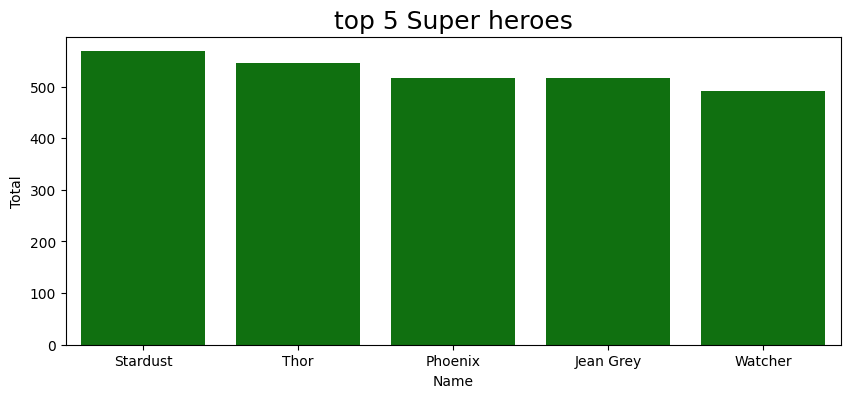

In [18]:
#choosing the color green bars. not using stylegg for this graph 
top_5_power_good = top_power_good[top_power_good['Power'] == 100].sort_values('Total', ascending=False).head()
plt.figure(figsize=(10,4))
sns.barplot(data=top_5_power_good,x='Name', y='Total', color='green')
plt.title('top 5 Super heroes', fontsize=18)
plt.show()

15. Extract villains who having a bad alignment 

In [19]:
#another seperate value for villains only. Can be useful for extensions
villans_only = df_marvel[df_marvel['Alignment'] == 'bad']

16. Show first five records of point 15 

In [20]:
villans_only.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
4,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
5,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics
11,Air-Walker,bad,50,85,100,85,100,40,460,Marvel Comics
17,Ammo,bad,1,1,1,1,0,1,5,Marvel Comics
23,Annihilus,bad,75,80,47,56,59,64,381,Marvel Comics


17. Show top five fastest super villains in terms of super speed

In [21]:
villans_only.sort_values('Speed', ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
11,Air-Walker,bad,50,85,100,85,100,40,460,Marvel Comics
5,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics
218,Fallen One II,bad,88,85,83,100,100,56,512,Marvel Comics
205,Ego,bad,88,80,83,99,71,28,449,Marvel Comics
203,Dormammu,bad,88,95,83,100,100,80,546,Marvel Comics


18. Top five super villains in terms of intelligence 

In [22]:
villans_only.sort_values('Intelligence', ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
336,Leader,bad,100,10,12,14,58,42,236,Marvel Comics
321,Kang,bad,100,48,58,70,71,70,417,Marvel Comics
29,Apocalypse,bad,100,100,33,100,100,60,493,Marvel Comics
194,Doctor Doom,bad,100,32,20,100,93,84,429,Marvel Comics
555,Tinkerer,bad,100,10,23,14,10,14,171,Marvel Comics


19. Show who is most dangerous super villain after calculating their total (top 5 only)

In [23]:
villans_only.sort_values('Total', ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
203,Dormammu,bad,88,95,83,100,100,80,546,Marvel Comics
356,Magus,bad,88,100,70,99,100,74,531,Marvel Comics
5,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics
218,Fallen One II,bad,88,85,83,100,100,56,512,Marvel Comics
422,Onslaught,bad,88,85,47,100,100,85,505,Marvel Comics


20. Draw a histogram for speed of super heroes having fig size 10.5, provide speed in histogram for only good alignment superheroes, title should be "distribution of speed", xlabel should be "speed"

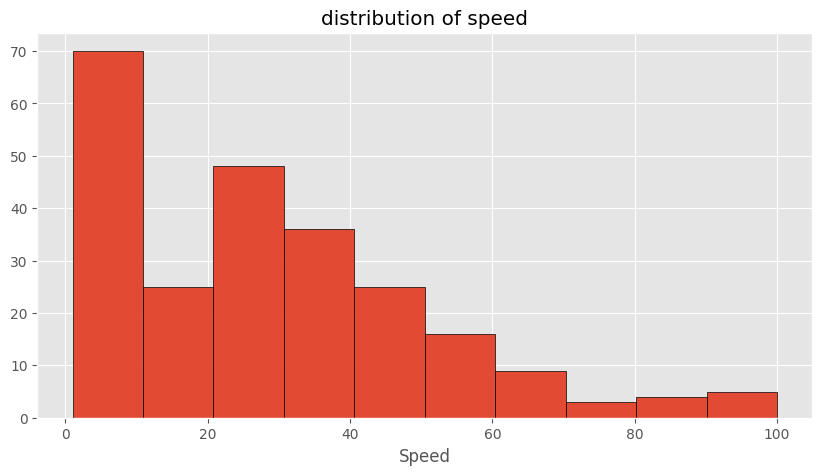

In [24]:
plt.style.use('ggplot') #just for style
heroes_speed = df_marvel[(df_marvel['Alignment'] == 'good')]
heroes_speed = heroes_speed[['Speed']]
plt.figure(figsize=(10,5))
plt.hist(heroes_speed, bins=10, edgecolor='black')
plt.xlabel('Speed')
plt.title('distribution of speed')

plt.show()

21. Draw a histogram for combat of super villains having fig size 10.5, provide combat in histogram for only bad alignment superheroes, title should be "distribution of combat", xlabel should be "combat"

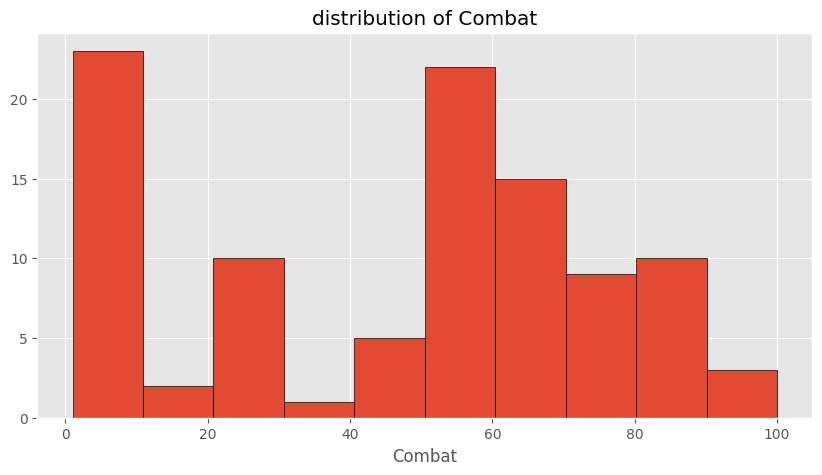

In [25]:
villans_only_combat = villans_only[['Combat']]
plt.figure(figsize=(10,5))
plt.hist(villans_only_combat, bins=10, edgecolor='black')
plt.xlabel('Combat')
plt.title('distribution of Combat')

plt.show()

Extensions
- 2 discoveries
- data cleaning (talked about in the beginning)
- 4 visualizations

22. Fun Discoveries #1

In [26]:
df[df['Name'] == 'Kool-Aid Man']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
330,Kool-Aid Man,good,25,10,12,14,10,14,85,Marvel Comics


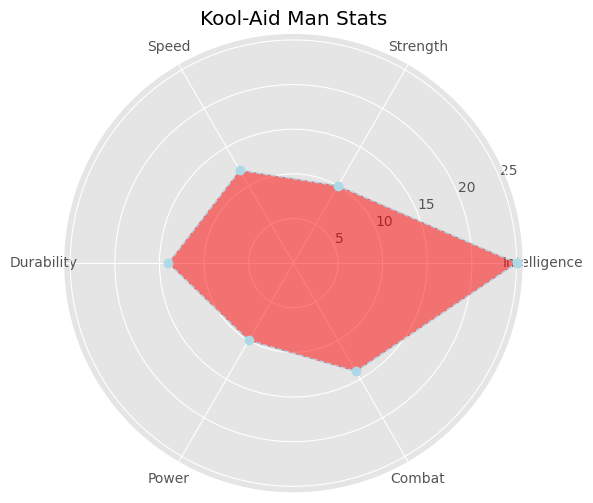

In [27]:
kool_aid = df.iloc[327] #koolaid mans location
attributes = df.columns[2:8].to_list()


values = kool_aid[2:8].to_list()
values += values[:1]#needed to even the shapes


angles = np.linspace(0, 2* np.pi, len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))


#creates the chart
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(polar=True)
ax.plot(angles, values, 'o--', linewidth=1, color='lightblue')
ax.fill(angles, values, alpha = 0.5, color='r')
ax.set_thetagrids([a * 180 / np.pi for a in angles[:-1]], attributes)
ax.set_title('Kool-Aid Man Stats')
ax.grid(True)
plt.tight_layout()
plt.show()


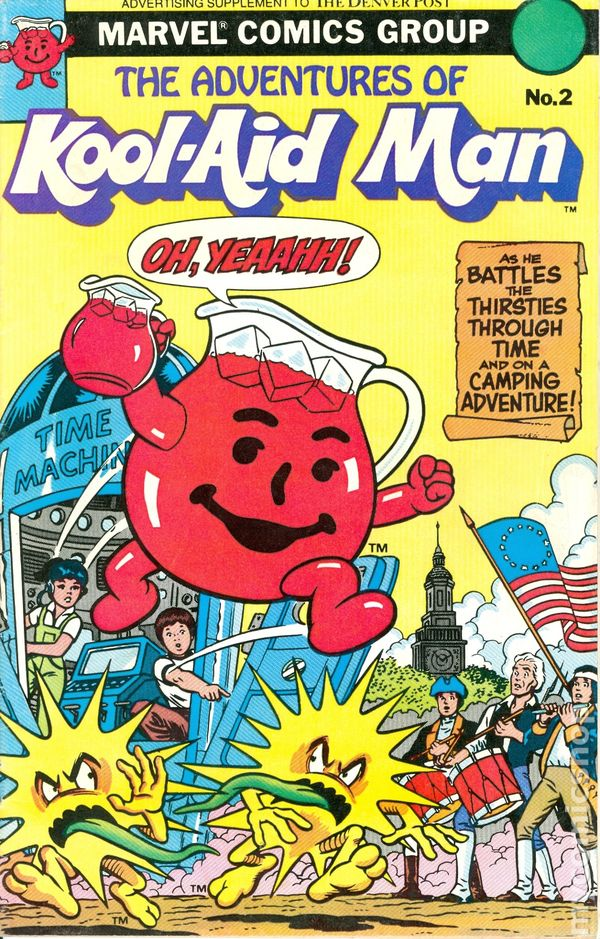

In [28]:
Image(filename='images\kool-aid-man.JPG')

23. Kang vs Lex Luthor
    - Smartest Human in the DC universe Vs. the Smartest Human in the Marvel Universe

In [29]:
df[(df['Name'] == 'Lex Luthor') | (df['Name'] == 'Kang')]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
321,Kang,bad,100,48,58,70,71,70,417,Marvel Comics
338,Lex Luthor,bad,100,10,12,14,10,28,174,DC Comics


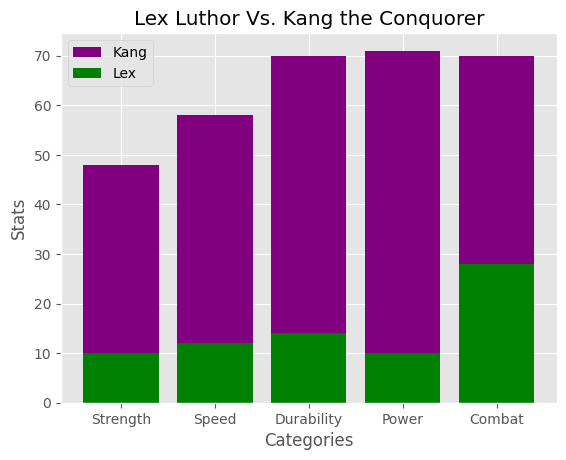

In [30]:
#Creating x lables for the graph
x_labels = ['Strength', 'Speed', 'Durability', 'Power', 'Combat']

#setting the two df
df_kang = df[df['Name'] == 'Kang']
df_lex = df[df['Name'] == 'Lex Luthor']
df_kang = df_kang[['Strength', 'Speed', 'Durability', 'Power', 'Combat']]
df_lex = df_lex[['Strength', 'Speed', 'Durability', 'Power', 'Combat']]

fig, ax = plt.subplots()
#tolist is used to make a list for the bar plot
ax.bar(x_labels, df_kang.iloc[0].tolist(), label='Kang', color='purple')
ax.bar(x_labels, df_lex.iloc[0].tolist(), label='Lex', color='green')
ax.set_xlabel('Categories')
ax.set_ylabel('Stats')
ax.set_title('Lex Luthor Vs. Kang the Conquorer')
ax.legend()

plt.show()


24. The use for 5 total stats for all Marvel, Dc, and NBC
    - A demonstration for visualization
    - Makes use of the  1 stats across the board rows

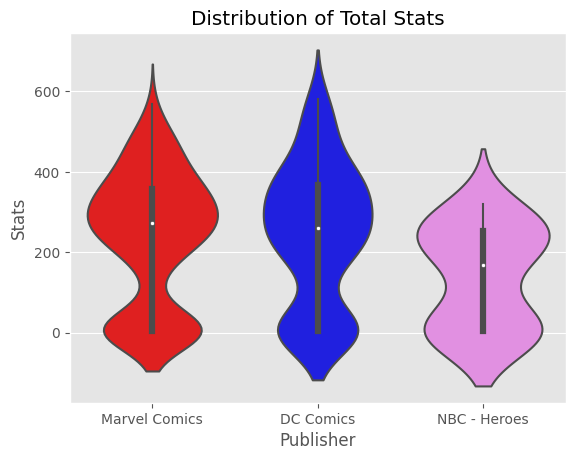

In [31]:
mvd = df[(df['Publisher'] == 'Marvel Comics') | (df['Publisher'] == 'DC Comics')| (df['Publisher'] == 'NBC - Heroes')]
#ee82ee is just for a different color than green
publisher_colors = {'Marvel Comics': 'r', 'DC Comics': 'b', 'NBC - Heroes': '#ee82ee'}
#creates the chart
sns.violinplot(x="Publisher", y="Total", data=mvd, palette=publisher_colors)
plt.xlabel("Publisher")
plt.ylabel("Stats")
plt.title("Distribution of Total Stats")
plt.show()

25. Fun Discoveries #2
    - There were two Captain Marvels with Identical stats
    - A publisher for both Marvel and DC

In [32]:
df[df['Name'] == 'Captain Marvel']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
138,Captain Marvel,good,100,100,67,95,62,56,480,Marvel Comics
138,Captain Marvel,good,100,100,67,95,62,56,480,DC Comics


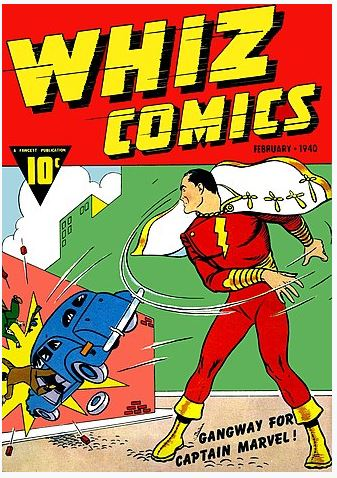

In [33]:
Image(filename='images\Captain-Marvel.JPG')

27. Pie chart of character average total for good vs bad
    - Villains are usually portrayed as overpowered or stronger than the heroes
    - Neutral usually comes from gods powerful entities that do not interfere (watchers from marvel)

In [34]:
good_bad_neutral = df.groupby('Alignment')[['Total']].mean().round(2)
good_bad_neutral

,Total
Alignment,
bad,248.69
good,216.17
neutral,355.36


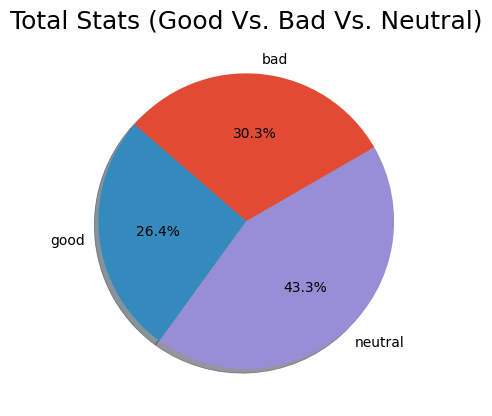

In [35]:
#shadows on the bottom left of the pie chart for styling
plt.pie(good_bad_neutral['Total'], labels=['bad', 'good', 'neutral'], shadow=True, startangle=30, autopct='%1.1f%%')
plt.title('Total Stats (Good Vs. Bad Vs. Neutral)', fontsize=18)
plt.show()


- Marvel and DC dataframe sent to a CSV for Tableu

In [46]:
marvel_dc = df[(df['Publisher'] == 'Marvel Comics') | (df['Publisher'] == 'DC Comics')]

In [47]:
marvel_dc = marvel_dc[marvel_dc['Total'] > 5]
marvel_dc.shape

(390, 10)

In [48]:
marvel_dc.to_csv('marvel_vs_dc.csv')